# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

In [2]:
## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


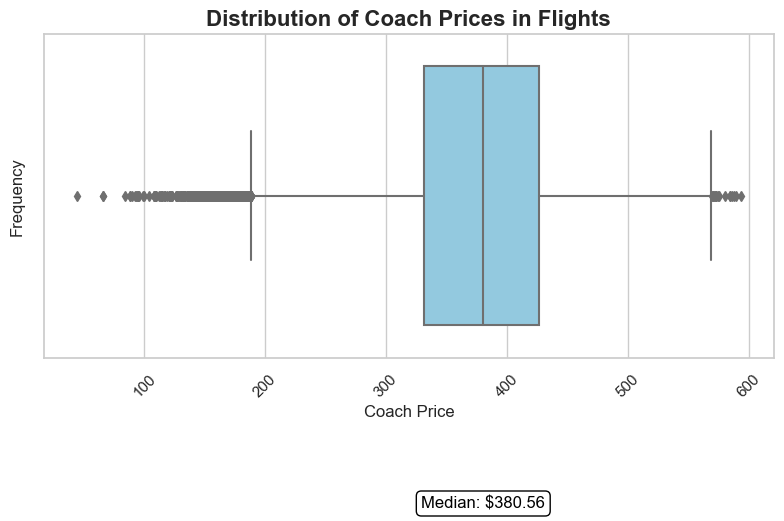

In [15]:
# Set up the plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Set font parameters for titles and labels
title_font = {'fontsize': 16, 'fontweight': 'bold'}
label_font = {'fontsize': 12}

# Create the box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
sns.boxplot(x="coach_price", data=flight, color="skyblue")

# Add title and labels with custom font settings
plt.title("Distribution of Coach Prices in Flights", fontdict=title_font)
plt.xlabel("Coach Price", fontdict=label_font)
plt.ylabel("Frequency", fontdict=label_font)

# Add additional annotations or context
plt.text(
    x=flight["coach_price"].median(),
    y=0.95,
    s=f"Median: ${flight['coach_price'].median():.2f}",
    ha="center",
    va="center",
    color="black",
    fontsize=12,
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
)

# Customize the x-axis ticks if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust spacing for labels
plt.show()


2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

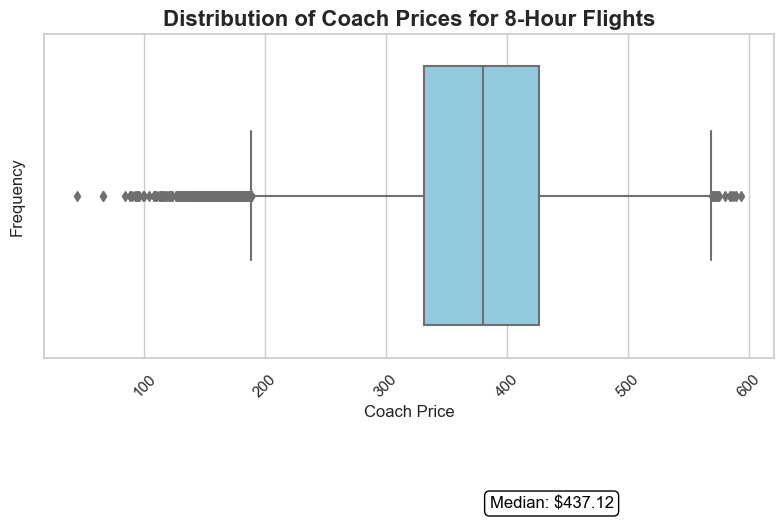

In [16]:
## Task 2
eight_hour_flights = flight[flight["hours"] == 8]
coach_price_8hr = eight_hour_flights["coach_price"]

# Set up the plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
sns.boxplot(x="coach_price", data=flight, color="skyblue")

# Set font parameters for titles and labels
title_font = {'fontsize': 16, 'fontweight': 'bold'}
label_font = {'fontsize': 12}

# Add title and labels
plt.title("Distribution of Coach Prices for 8-Hour Flights", fontdict=title_font)
plt.xlabel("Coach Price", fontdict=label_font)
plt.ylabel("Frequency", fontdict=label_font)

# Add additional annotations or context
plt.text(
    x=coach_price_8hr.median(),
    y=0.95,
    s=f"Median: ${coach_price_8hr.median():.2f}",
    ha="center",
    va="center",
    color="black",
    fontsize=12,
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
)

# Customize the x-axis ticks if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust spacing for labels
plt.show()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

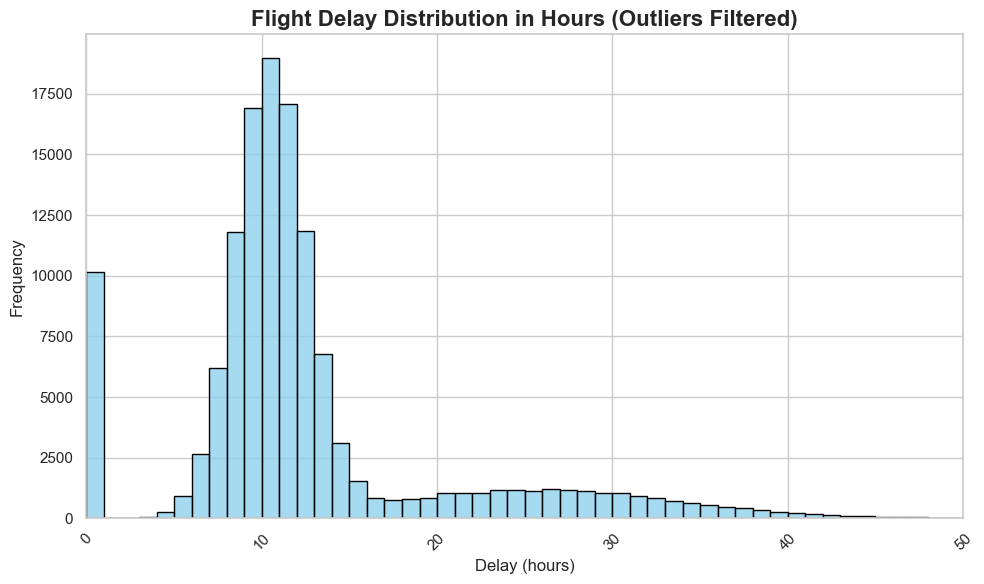

In [19]:
## Task 3

# Set a threshold for outliers (adjust as needed)
outlier_threshold = 50  # For example, considering any value above 100 hours as an outlier

# Filter out outliers
filtered_flight = flight[flight['delay'] <= outlier_threshold]

# Set up the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Set style using Seaborn
sns.set(style="whitegrid")

# Create a histogram using Seaborn with more bins
sns.histplot(data=filtered_flight, x='delay', bins=50, color='skyblue', edgecolor='black')

plt.title("Flight Delay Distribution in Hours (Outliers Filtered)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel("Delay (hours)", fontdict={'fontsize': 12})
plt.ylabel("Frequency", fontdict={'fontsize': 12})

# Set the x-axis limits
plt.xlim(0, outlier_threshold)

# Customize the appearance
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust spacing for labels
plt.show()



## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

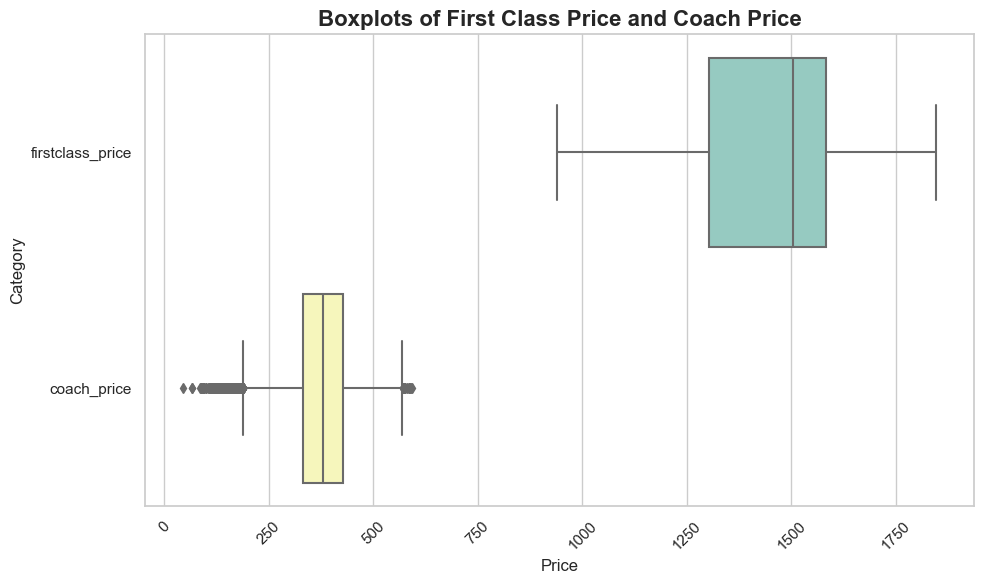

In [21]:
## Task 4

# Melt the data to create a pivoted side-by-side boxplot
melted_data = flight.melt(value_vars=['firstclass_price', 'coach_price'], var_name='Category', value_name='Price')

# Set up the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Set style using Seaborn
sns.set(style="whitegrid")

# Create a side-by-side boxplot using Seaborn
sns.boxplot(x='Price', y='Category', data=melted_data, palette="Set3")


# Add title and labels
plt.title("Boxplots of First Class Price and Coach Price", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel("Price", fontdict={'fontsize': 12})
plt.ylabel("Category", fontdict={'fontsize': 12})

# Customize the appearance
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust spacing for labels
plt.show()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

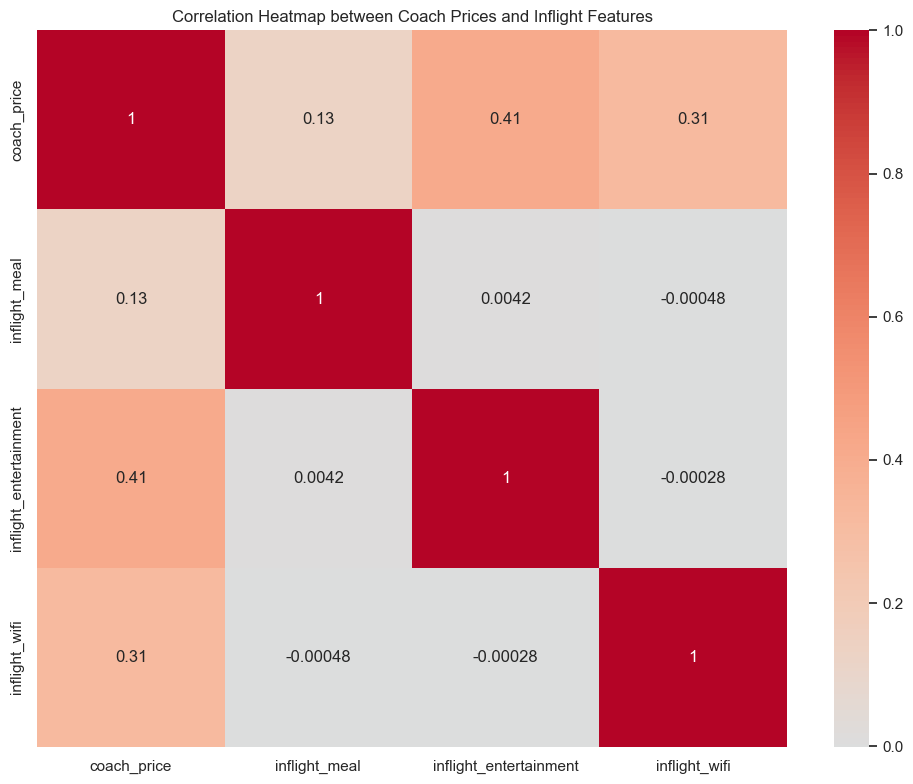

In [23]:
## Task 5
# Convert categorical variables to binary (0 and 1)
flight['inflight_meal'] = (flight['inflight_meal'] == 'Yes').astype(int)
flight['inflight_entertainment'] = (flight['inflight_entertainment'] == 'Yes').astype(int)
flight['inflight_wifi'] = (flight['inflight_wifi'] == 'Yes').astype(int)

# Choose the relevant columns
selected_columns = ['coach_price', 'inflight_meal', 'inflight_entertainment', 'inflight_wifi']

# Create a heatmap of correlations
correlation_matrix = flight[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add title
plt.title("Correlation Heatmap between Coach Prices and Inflight Features")

# Show the heatmap
plt.tight_layout()
plt.show()


6. How does the number of passengers change in relation to the length of flights?

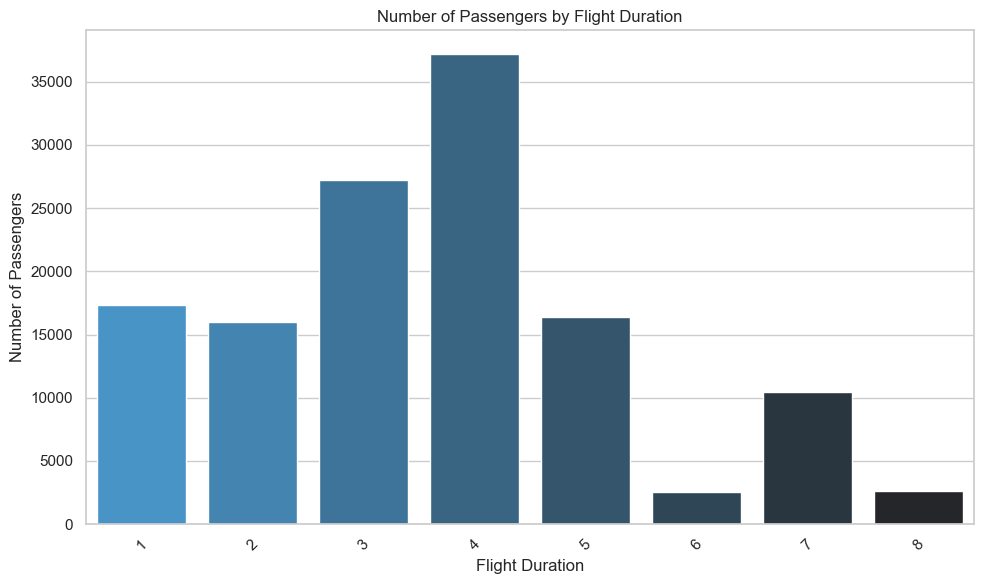

In [38]:
## Task 6
# Define the base color
base_color = "#3498db"  # A shade of blue

# Generate a color map with 8 different intensities of the base color
color_map = sns.color_palette(sns.dark_palette(base_color, n_colors=8))

# Reverse the color map to have the lightest color represent 1 and the most intense color represent 8
reversed_color_map = color_map[::-1]

# Set up the Seaborn style with the custom color palette
sns.set(style="whitegrid")

# Assuming you've already loaded or generated your DataFrame

# Set up the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create a countplot using Seaborn and apply the reversed custom color map
sns.countplot(x='hours', data=flight, palette=reversed_color_map)

# Add title and labels
plt.title("Number of Passengers by Flight Duration")
plt.xlabel("Flight Duration")
plt.ylabel("Number of Passengers")

# Customize the appearance
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust spacing for labels
plt.show()



## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

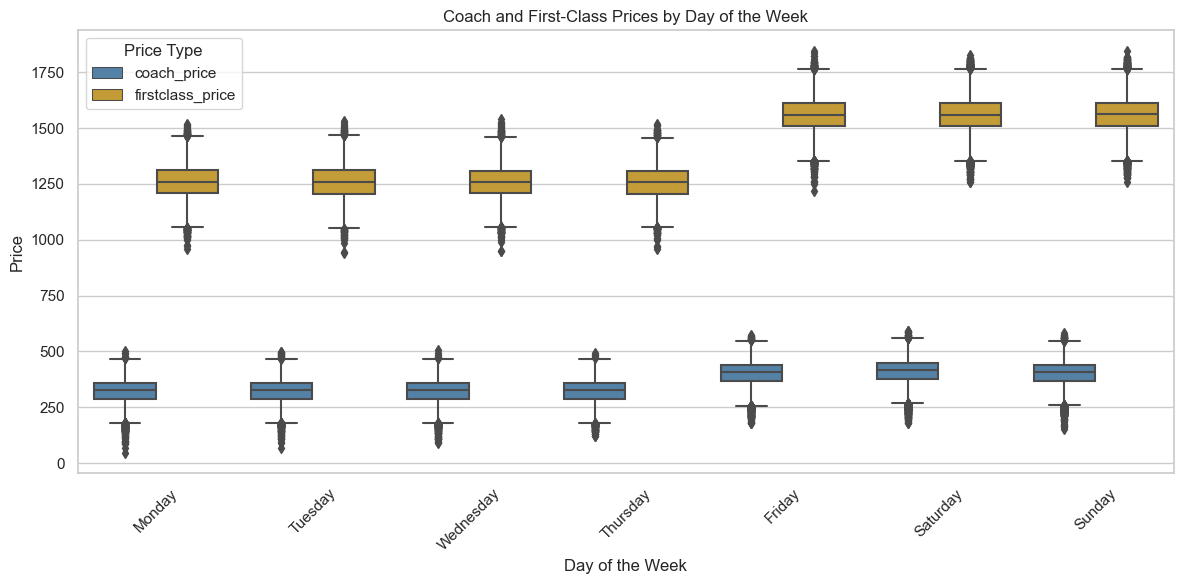

In [52]:
## Task 7
# Convert the 'day_of_week' column to categorical for proper ordering
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
flight['day_of_week'] = pd.Categorical(flight['day_of_week'], categories=weekday_order, ordered=True)

# Melt the data to create a long-form DataFrame
melted_flight = flight.melt(id_vars=['day_of_week'], value_vars=['coach_price', 'firstclass_price'], 
                            var_name='price_type', value_name='price')

# Set up the plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Set custom palette colors
custom_palette = {'coach_price': 'steelblue', 'firstclass_price': 'goldenrod'}

# Set style using Seaborn
sns.set(style="whitegrid")

# Create side-by-side box plots using Seaborn with custom palette
sns.boxplot(x='day_of_week', y='price', data=melted_flight, hue='price_type', palette=custom_palette)

# Add title and labels
plt.title("Coach and First-Class Prices by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Price")
plt.legend(title="Price Type")

# Customize the appearance
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust spacing for labels
plt.show()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

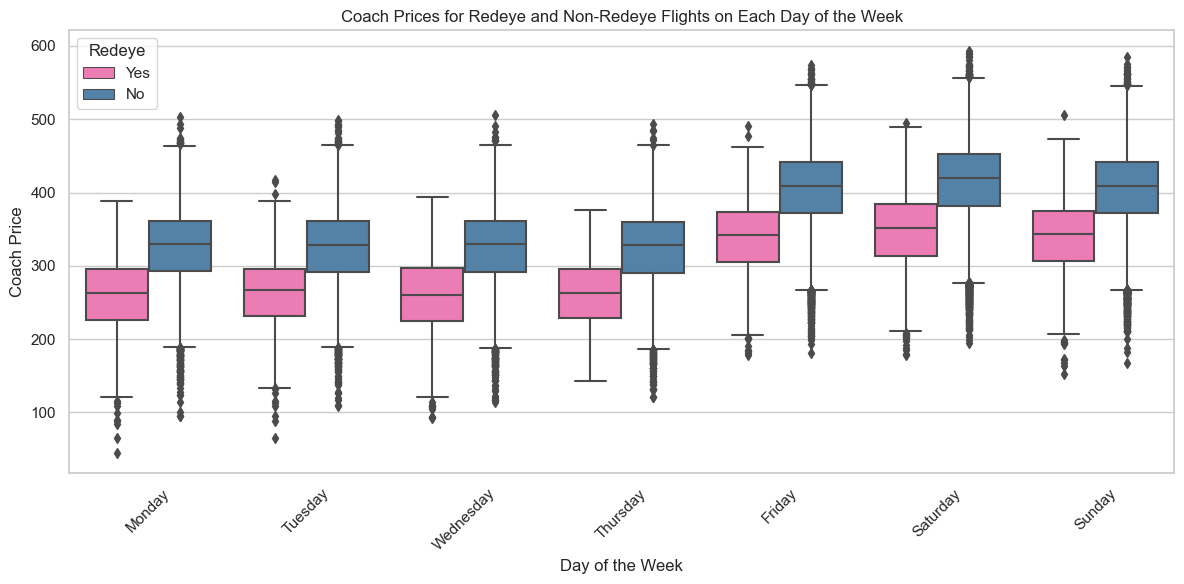

In [50]:
# Set up the plot
# Convert the 'day_of_week' column to categorical for proper ordering
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
flight['day_of_week'] = pd.Categorical(flight['day_of_week'], categories=weekday_order, ordered=True)

# Set up the plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Set custom palette colors for 'redeye' values
custom_palette = {"Yes": "#FF69B4", "No": "steelblue"}

# Set style using Seaborn
sns.set(style="whitegrid")

# Create side-by-side box plots using Seaborn with 'hue' parameter and custom palette
sns.boxplot(x='day_of_week', y='coach_price', data=flight, hue='redeye', palette=custom_palette)

# Add title and labels
plt.title("Coach Prices for Redeye and Non-Redeye Flights on Each Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Coach Price")
plt.legend(title="Redeye")

# Customize the appearance
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust spacing for labels
plt.show()
